<a href="https://colab.research.google.com/github/sarumathi03/Stock-price-prediction/blob/main/Stock_price_prediction_MINI_project_June_17_to_June_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESCRIPTION OF THE PROBLEM : The main objective of this project concerns with predicting the prices of a particular stock that has been listed in stock market based on the data of the previous 5 years.This project uses two algorithms namely decision tree regresssor and the linear regression model to predict the values in future.


In [ ]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/AAPL_data.csv') 

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [ ]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [ ]:
df.shape

(1259, 7)

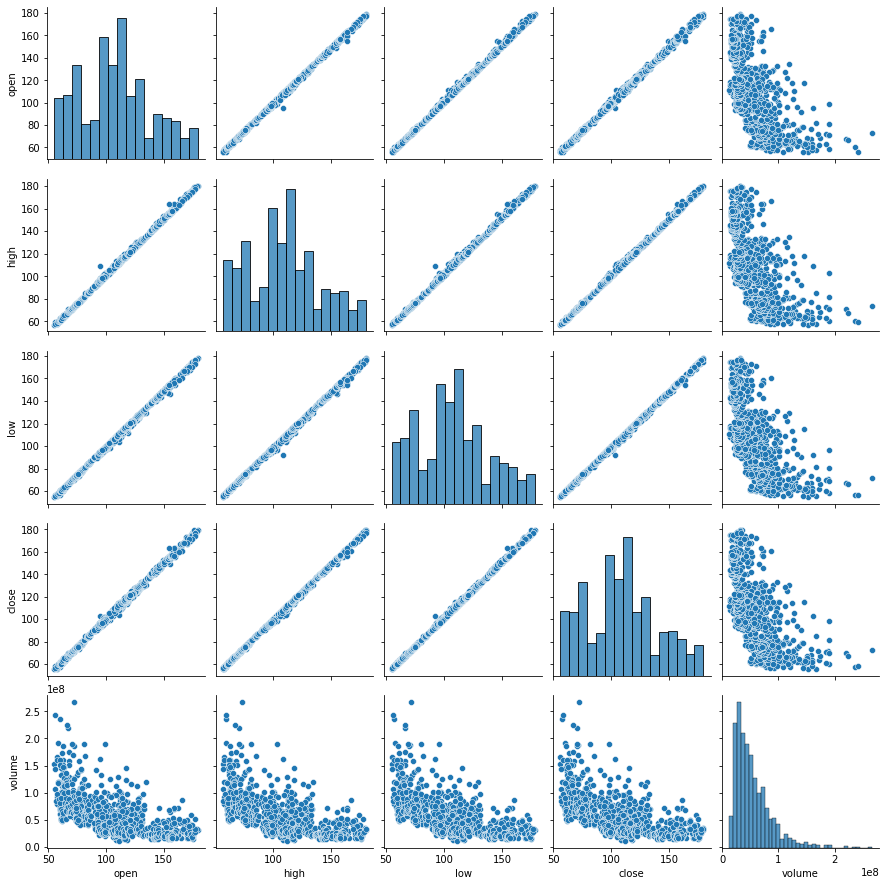

In [ ]:
sns.pairplot(df)


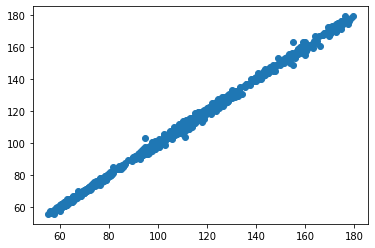

In [ ]:
plt.scatter(df['open'],df['close'])


EXPLORATORY DATA ANALYSIS

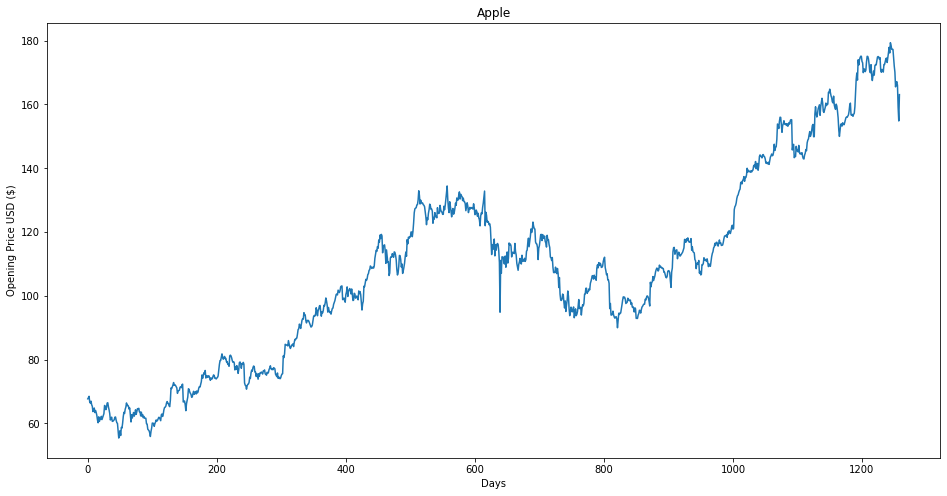

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

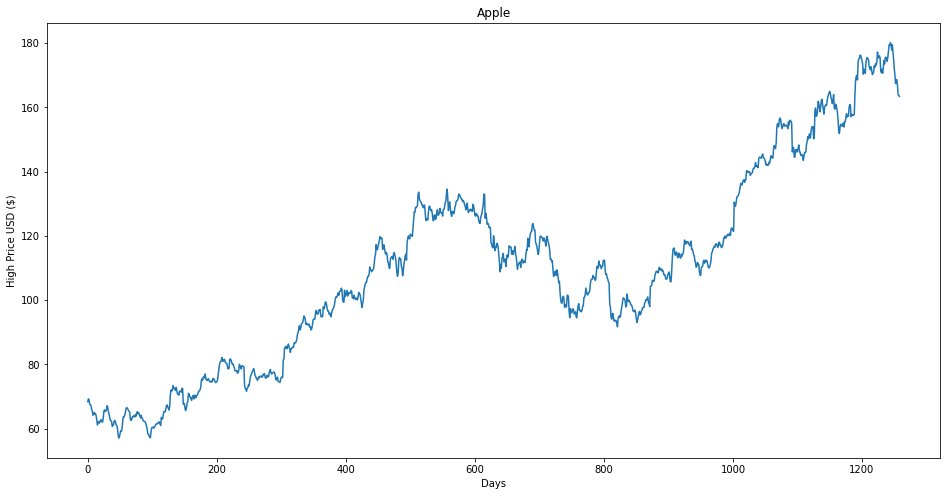

In [ ]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

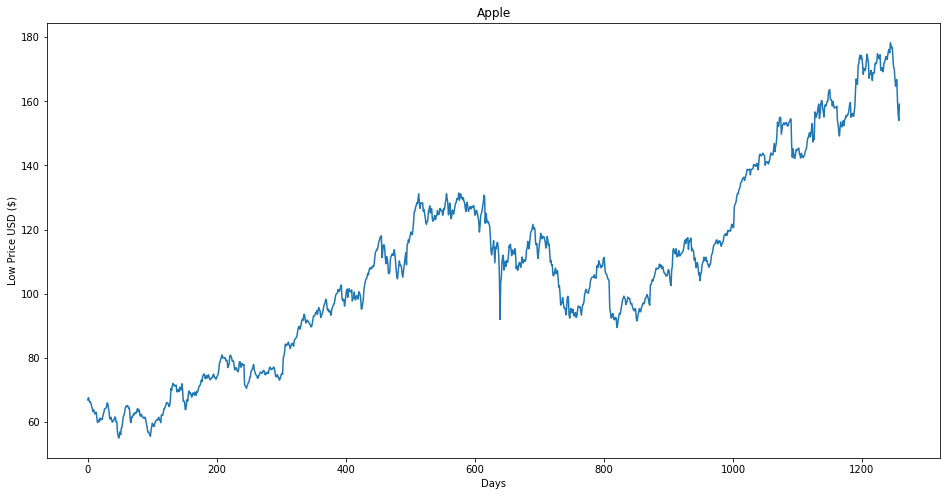

In [ ]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

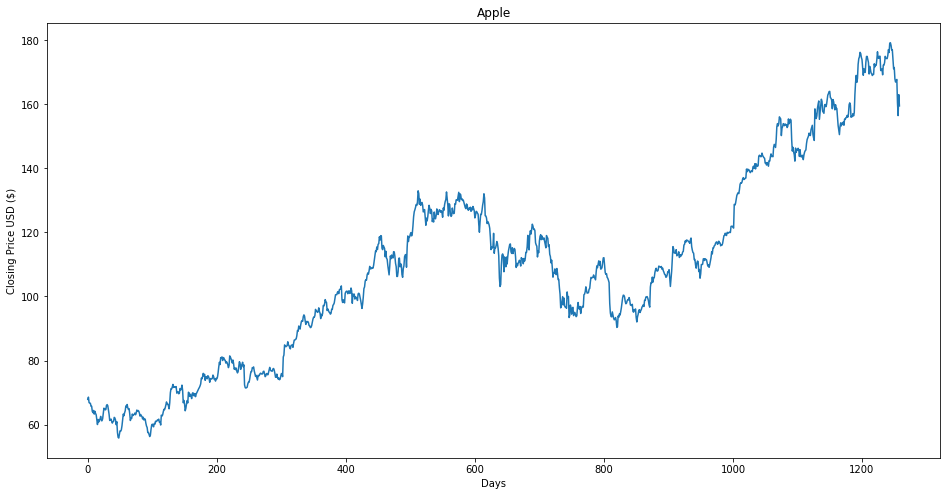

In [ ]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [ ]:
df2 = df['close']

In [ ]:
df2.tail()

1254    167.78
1255    160.50
1256    156.49
1257    163.03
1258    159.54
Name: close, dtype: float64

In [ ]:
df2 = pd.DataFrame(df2) 

In [ ]:
df2.tail()

,close
1254,167.78
1255,160.50
1256,156.49
1257,163.03
1258,159.54


In [ ]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [ ]:
df2.tail()

,close,Prediction
1254,167.78,NaN
1255,160.50,NaN
1256,156.49,NaN
1257,163.03,NaN
1258,159.54,NaN


In [ ]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 67.8542]
 [ 68.5614]
 [ 66.8428]
 ...
 [160.86  ]
 [159.65  ]
 [158.28  ]]


In [ ]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 60.1142  59.6314  59.2928 ... 156.49   163.03   159.54  ]


LINEAR REGRESSION AND DECISION TREE REGRESSOR

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[144.53],
       [143.68],
       [143.79],
       [143.65],
       [146.58],
       [147.51],
       [147.06],
       [146.53],
       [148.96],
       [153.01],
       [153.99],
       [153.26],
       [153.95],
       [156.1 ],
       [155.7 ],
       [155.47],
       [150.25],
       [152.54],
       [153.06],
       [153.99],
       [153.8 ],
       [153.34],
       [153.87],
       [153.61],
       [153.67],
       [152.76],
       [153.18],
       [155.45],
       [153.93],
       [154.45],
       [155.37],
       [154.99],
       [148.98],
       [145.42],
       [146.59],
       [145.16],
       [144.29],
       [142.27],
       [146.34],
       [145.01],
       [145.87],
       [145.63],
       [146.28],
       [145.82],
       [143.73],
       [145.83],
       [143.68],
       [144.02],
       [143.5 ],
       [144.09],
       [142.73],
       [144.18],
       [145.06],
       [145.53],
       [145.74],
       [147.77],
       [149.04],
       [149.56],
       [150.08

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[159.88  164.325 158.73  156.07  153.39  151.89  150.55  153.14  169.04
 153.28  155.06  153.81  154.48  153.48  155.39  157.1   155.84  155.9
 156.55  155.06  156.99  159.88  156.41  159.76  159.76  156.25  156.17
 157.1   156.41  157.41  163.05  166.72  169.04  166.89  168.11  172.5
 174.25  174.81  176.24  175.88  174.67  173.97  171.34  169.08  171.1
 169.08  164.325 167.305 174.96  174.97  174.09  173.07  169.48  171.85
 171.05  169.8   169.64  169.01  155.84  169.37  172.67  171.7   172.27
 172.22  159.88  176.42  174.54  174.35  167.78  175.01  170.57  153.48
 171.08  169.23  172.26  172.23  175.28  175.    174.35  174.33  175.28
 175.28  177.09  175.    179.1   179.26  178.46  160.5   177.04  174.22
 174.22  174.22  167.96  166.97  167.43  167.78  160.5   156.49  163.03
 159.54 ]


In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[151.37048438 150.56859567 150.67236951 150.54029372 153.30445125
 154.18181183 153.75728252 153.25728133 155.54973962 159.37050344
 160.29503394 159.60635306 160.257298   162.28560472 161.90824533
 161.69126369 156.76672365 158.92710616 159.41767336 160.29503394
 160.11578823 159.68182494 160.18182613 159.93654252 159.99314643
 159.13465382 159.53088118 161.67239572 160.23843004 160.72899724
 161.59692384 161.23843242 155.56860759 152.21010902 153.31388523
 151.96482542 151.14406874 149.23840383 153.07803562 151.82331565
 152.63463833 152.4082227  153.02143171 152.58746841 150.6157656
 152.59690239 150.56859567 150.88935116 150.39878395 150.95538905
 149.67236712 151.04029491 151.87048557 152.31388285 152.51199653
 154.42709543 155.6252115  156.1157787  156.60634591 157.49314048
 156.85162951 156.78559162 158.50257684 159.11578585 159.79503275
 157.05917718 156.05917479 155.33275797 164.63466692 163.26673914
 161.78560353 162.55919028 164.84221459 166.04033065 166.96486116
 161.549753

In [ ]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


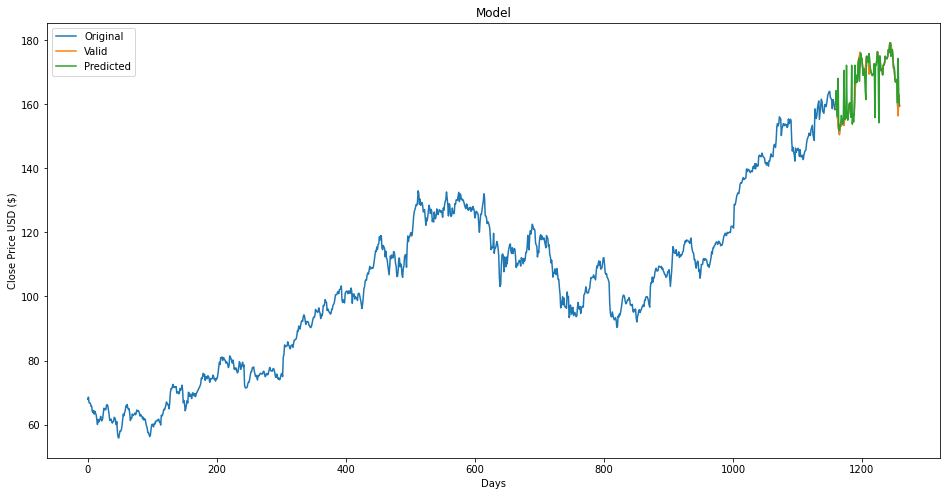

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()